# Understanding Descriptive Statistics

Import the necessary libraries here:

In [12]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random 
from random import randint 
from collections import defaultdict 

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [53]:
def roll(times):
    dice = {}
    for i in range(1, times+1): 
        results = random.randint(1, 6)
        dice[i] = results
    df = pd.DataFrame(dice.items(),columns=['roll time','roll result'])
    return df

In [54]:
df = roll(10)
df

,roll time,roll result
0,1,2
1,2,2
2,3,4
3,4,3
4,5,2
5,6,1
6,7,6
7,8,4
8,9,6
9,10,2


#### 2.- Plot the results sorted by value.

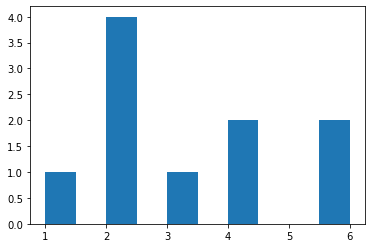

In [55]:
# your code here
df = df.sort_values(by = 'roll result')
plt.hist(df['roll result'])
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [113]:
# your code here
df1 = df.value_counts(['roll result'])
df1

roll result
2              4
4              2
6              2
1              1
3              1
dtype: int64

<AxesSubplot:xlabel='roll result'>

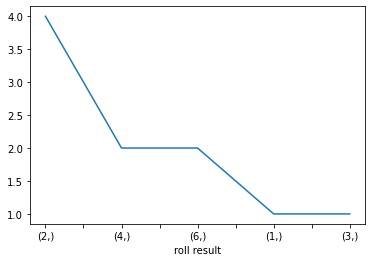

In [114]:
df1.plot()

In [ ]:
"""
your comments here

On both plots we have the same information. 
It gives us visualizating how many times each number on dice appears in our random rolling.
Probably, we can even filter dataframe to receive exactly same plots

"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [67]:
# your code here
def mean():
    observ_sum = df['roll result'].sum()
    total_observ = df.shape[0]
    mean = observ_sum / total_observ
    return mean

mean()

3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [123]:
# your code here
# in challange 1 i alredy calculate the frequency distribution
df2 = df.value_counts(['roll result']).rename_axis('values').reset_index(name='counts')
df2['sum'] = df2['values'] * df2['counts']
a = df2['sum'].sum()
mean_of_values = a/10 # 10 times we rolled the dice
mean_of_values

3.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [141]:
# your code here
def median():
    array = df['roll result'].values
    array.sort()
    l = len(array)
    if (l % 2) == 0:
        median = (array[l//2-1]+array[l//2])/2
    else:
        median = array[l/2]/2
    return median

median()

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [158]:
# your code here
def quartiles():
    array = df['roll result'].values
    array.sort()
    l = len(array)
    a = (l + 1) / 4
    q1 = array[int(a)-1] 
    q2 = median()
    b = (3 *(l + 1)) / 4
    q3 = array[int(b)-1]
    q4 = array[l-1]
    return q1, q2, q3, q4

# i used -1 here because we are callig value by index
# and because index starts from 0, but counting from 1, we need to step back
# and formula how to find the placement of q1 and q3 (my a and b) i found in internet 
# but yes, a and b are the place in array, what mean for index we need to use a-1 and b-1

quartiles() 

(2, 2.5, 4, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [163]:
# your code here

roll100 = pd.read_csv('/Users/olhapopova/Documents/GitHub/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')
roll100 = roll100.sort_values(by = 'value')
roll100

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


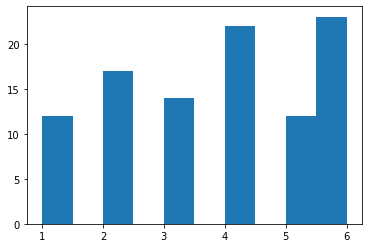

In [169]:
plt.hist(roll100['value'])
plt.show()

In [ ]:
"""
your comments here

Plot gives me a piture that 6 was rolled the most frequant times, 
4 slightly less, 1 and 5 are same

"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [171]:
# your code here
def mean():
    observ_sum = roll100['value'].sum()
    total_observ = roll100.shape[0]
    mean = observ_sum / total_observ
    return mean

mean()

3.74

#### 3.- Now, calculate the frequency distribution.


In [172]:
# your code here
freq = roll100.value_counts(['value']).rename_axis('values').reset_index(name='counts')
freq

,values,counts
0,6,23
1,4,22
2,2,17
3,3,14
4,1,12
5,5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

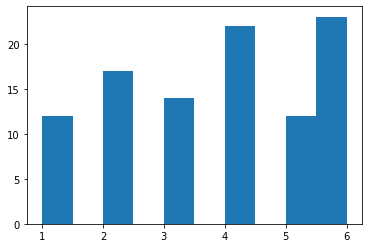

In [178]:
# your code here
plt.hist(roll100.value)
plt.show()

In [ ]:
"""
your comments here

Histogram visualizy frequency distribution very well, 
we can see what values appears less and most. 
About mean - also logical, because we see than average value is between 3 and 4, for what mean
gives us better answer. 

"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [188]:
# your code here
roll1000 = pd.read_csv('/Users/olhapopova/Documents/GitHub/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')
roll1000 = roll1000.sort_values(by = 'value')
roll1000

,Unnamed: 0,roll,value
564,564,564,1
922,922,922,1
560,560,560,1
213,213,213,1
214,214,214,1
...,...,...,...
855,855,855,6
360,360,360,6
857,857,857,6
388,388,388,6


In [189]:
freq1 = roll1000.value_counts(['value']).rename_axis('values').reset_index(name='counts')
freq1

,values,counts
0,1,175
1,3,175
2,4,168
3,2,167
4,6,166
5,5,149


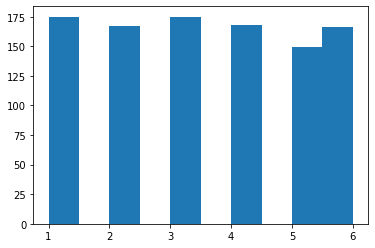

In [190]:
plt.hist(roll1000.value)
plt.show()

In [191]:
def mean():
    observ_sum = roll1000['value'].sum()
    total_observ = roll1000.shape[0]
    mean = observ_sum / total_observ
    return mean

mean()

3.447

In [ ]:
"""
your comments here

From histogram we can see the frequency distribution and what value appears less and most,
but as many rolls we do - as less difference between max and min become.
Mean of roll100 and roll1000 is not much different, but it goes more to 3 what is the middle 
of our values. 

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [192]:
# your code here
age = pd.read_csv('/Users/olhapopova/Documents/GitHub/lab-understanding-descriptive-stats/data/ages_population.csv')
age

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [198]:
freq_age = age.value_counts(['observation']).reset_index(name='counts')
freq_age

,observation,counts
0,39.0,45
1,41.0,36
2,30.0,34
3,35.0,33
4,43.0,32
...,...,...
67,69.0,1
68,70.0,1
69,71.0,1
70,73.0,1


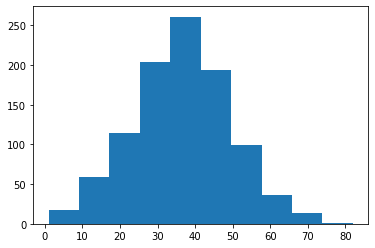

In [199]:
plt.hist(age.observation)
plt.show()

In [ ]:
# For me it looks like mean will be around 35, 
# and the disperse of data +/- after 15,
# so i think the standard deviation can be aroun 15-20

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [201]:
# your code here
mean_age1 = age.mean()
mean_age1

observation    36.56
dtype: float64

In [202]:
np.std(age)

observation    12.81009
dtype: float64

In [ ]:
"""
your comments here

Real mean and standard deviation were pretty close from that what i expected,
but ofc not so sharp, 
especially standard deviation is not so intuitive from grapgh

"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [203]:
# your code here
age2 = pd.read_csv('/Users/olhapopova/Documents/GitHub/lab-understanding-descriptive-stats/data/ages_population2.csv')
age2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [204]:
freq_age2 = age2.value_counts(['observation']).reset_index(name='counts')
freq_age2

,observation,counts
0,28.0,139
1,27.0,125
2,26.0,120
3,29.0,115
4,25.0,98
5,30.0,90
6,24.0,78
7,31.0,61
8,23.0,41
9,22.0,35


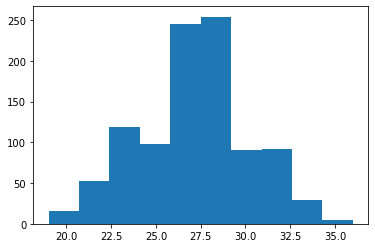

In [205]:
plt.hist(age2.observation)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

Here we have a sample with more data in smaller range, so we can see more accurate 
information from graph. For example, i can say, than mean is around 27+/-1, not like in 
previous - from 30 to 40

"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [206]:
# your code here
mean_age2 = age2.mean()
mean_age2

observation    27.155
dtype: float64

In [207]:
np.std(age2)

observation    2.968329
dtype: float64

In [ ]:
"""
your comments here

This sample was much more strict and accurate, mean was predictable with less probability
for mistake and standard deviation is much smaller, what means that our data is located mostly
around mean and are nor so disperse

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [208]:
# your code here
age3 = pd.read_csv('/Users/olhapopova/Documents/GitHub/lab-understanding-descriptive-stats/data/ages_population3.csv')
age3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [209]:
freq_age3 = age3.value_counts(['observation']).reset_index(name='counts')
freq_age3

,observation,counts
0,32.0,37
1,37.0,31
2,35.0,31
3,39.0,29
4,36.0,26
...,...,...
70,8.0,1
71,7.0,1
72,5.0,1
73,76.0,1


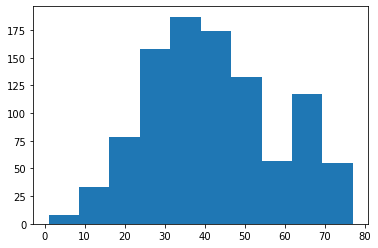

In [210]:
plt.hist(age3.observation)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [212]:
# your code here
mean_age3 = age3.mean()
mean_age3

observation    41.989
dtype: float64

In [213]:
np.std(age3)

observation    16.136632
dtype: float64

In [ ]:
"""
your comments here

From first look to the plot it was predictible that mean would be in different place that
in previous examples and that standart deviation would be bigger. On plot we can see 
growind number of observation on age 65-70, what definitely will affect mean and what 
means more disperse data and what leads to bigger standard deviation

"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [214]:
# your code here
q1 = np.quantile(age3, 0.25)
print('the first quartile is ', q1)

q2 = np.quantile(age3, 0.50)
print('the second quartile is ', q2)

q3 = np.quantile(age3, 0.75)
print('the third quartile is ', q3)

q4 = age3.max()
print('the fourth quartile is ', q4)

the first quartile is  30.0
the second quartile is  40.0
the third quartile is  53.0
the fourth quartile is  observation    77.0
dtype: float64


In [215]:
age3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here

Mean is bigger than median, not much, but it shows that growing numbers in the end of 
dataset 'age3' affects mean, but median shows us central result, where sould be mean as well
without that jump in age of 65-70. The magor part of data we suppose to have between first 
and third quartile, but standard deviation also kind of big becaus forth quartile is far 
away from third quartile what shows us large spread of data between third and fourth
quaqrtile, what again affects mean.

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [220]:
# your code here
q10 = np.quantile(age3, 0.10)
print('10 percentile is ', q10)

q20 = np.quantile(age3, 0.20)
print('20 percentile is ', q20)

q70 = np.quantile(age3, 0.70)
print('70 percentile is ', q3)

q80 = np.quantile(age3, 0.80)
print('80 percentile is ', q80)

q85 = np.quantile(age3, 0.85)
print('85 percentile is ', q85)

q90 = np.quantile(age3, 0.90)
print('90 percentile is ', q90)

q95 = np.quantile(age3, 0.95)
print('95 percentile is ', q95)

10 percentile is  22.0
20 percentile is  28.0
70 percentile is  53.0
80 percentile is  57.0
85 percentile is  64.0
90 percentile is  67.0
95 percentile is  70.0


In [ ]:
"""
your comments here

If we would look into min and 10 percentile we can see i huge difference in our data, 
age grows from 1 to 22 what mean that we have very little count of observations in that age, 
what makes age 1 an outlier, ir affects mean, but it is only small part of our data. 
Than from 20 to 25 percentile is not a big change. Our 70 and 75 percentiles are same, 
what means our data doesn't change in that part. So our upper quartile can be not on 75 
percentile but on 70. I want to look where we have that increasing data. Our 90 percentile
is 67 and maximum value is 77, so the last 10% of data are also disperse as first 10%. And we
actually have a lot of data between 85 and 90 percentile, because values are not change much. 
Usually we are looking into data between 25 and 75 percentiles and meadian, but if mean bigger
than median - it pushed me to take a look into data after 75 percentile as well. Also plot helps
to visualize our dataset and understand in what way we need to take a deeper look

"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""